In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/User/Desktop/ML Zoomcamp/laptops.csv")

In [3]:
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [5]:
data.columns= data.columns.str.lower().str.replace(' ', '_')

In [6]:
data.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [7]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')>

In [8]:
data.drop(columns=['laptop', 'status', 'brand', 'model', 'cpu',
       'storage_type', 'gpu', 'touch'],
                       inplace=True)

In [9]:
data.columns

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

<Axes: xlabel='final_price', ylabel='Count'>

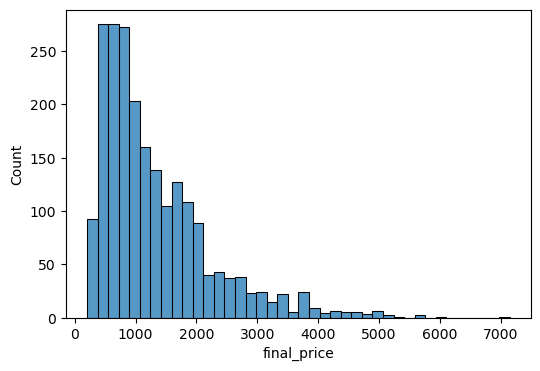

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data.final_price, bins=40)

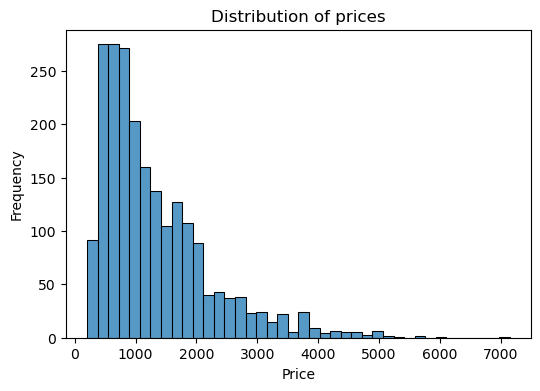

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data.final_price[data.final_price<100000], bins=40)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

In [12]:
np.log1p([0, 1, 10, 100, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [13]:
np.log1p([0+1, 1+1, 10+1, 100+1, 1000+1, 10000+1])

array([0.69314718, 1.09861229, 2.48490665, 4.62497281, 6.90975328,
       9.21054035])

In [14]:
price_logs = np.log1p(data.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

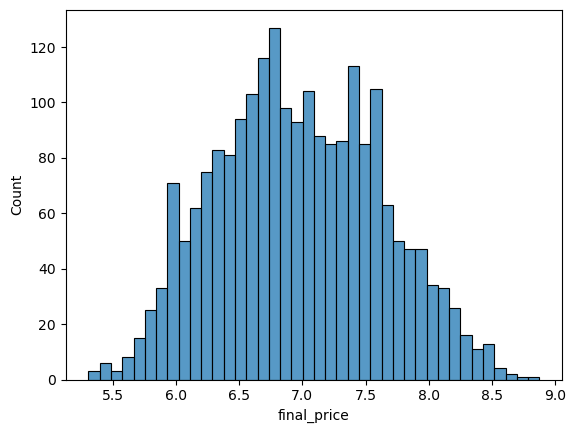

In [15]:
sns.histplot(price_logs, bins=40)

In [16]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [17]:
data.ram.nunique

<bound method IndexOpsMixin.nunique of 0        8
1        8
2        8
3       16
4       16
        ..
2155    16
2156    16
2157    32
2158    16
2159    16
Name: ram, Length: 2160, dtype: int64>

In [18]:
data.ram.iloc[[1080, 1081]]

1080    8
1081    8
Name: ram, dtype: int64

In [19]:
n=len(data)

In [20]:
n

2160

In [21]:
idx=np.arange(n)

In [22]:
np.random.shuffle(idx)
np.random.seed(2)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n-(n_val+n_test))
data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [23]:
n_train, n_val, n_test

(1296, 432, 432)

In [24]:
data_train.head()

,ram,storage,screen,final_price
2060,16,1000,15.6,1749.00
1446,16,512,14.0,977.00
1130,8,256,13.3,765.33
1323,8,256,15.6,2450.71
169,16,512,15.6,779.01


In [25]:
data_train=data_train.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)

In [26]:
data_train

,ram,storage,screen,final_price
0,16,1000,15.6,1749.00
1,16,512,14.0,977.00
2,8,256,13.3,765.33
3,8,256,15.6,2450.71
4,16,512,15.6,779.01
...,...,...,...,...
1291,8,256,15.6,539.01
1292,4,128,14.0,208.99
1293,8,256,15.6,999.00
1294,16,256,12.3,1111.35


In [27]:
data_train.ram.unique()

array([ 16,   8,  64,  12,  32,   4,  40,   6, 128], dtype=int64)

In [28]:
data_train['screen'].fillna('0', inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12476\2514367101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['screen'].fillna('0', inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_12476\2514367101.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_train['screen'].fillna('0', inplace = True)


In [29]:
data_train.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [30]:
y_train_orig = data_train.final_price.values
y_val_orig = data_val.final_price.values
y_test_orig = data_test.final_price.values

y_train = np.log1p(data_train.final_price.values)
y_val = np.log1p(data_val.final_price.values)
y_test = np.log1p(data_test.final_price.values)

del data_train['final_price']
del data_val['final_price']
del data_test['final_price']

In [31]:
data_train.head()

,ram,storage,screen
0,16,1000,15.6
1,16,512,14.0
2,8,256,13.3
3,8,256,15.6
4,16,512,15.6


In [32]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    XTX=X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    w=w_full[1:]
    w0=w_full[0]
    return w0, w

In [33]:
base= ['ram', 'storage', 'screen']

In [34]:
def prepare_X(data):
    data_num = data[base]
    data_num = data_num.fillna(0)
    X = data_num.values
    return X

In [35]:
X_train = prepare_X(data_train).astype(int)
w0, w = train_linear_regression(X_train, y_train)

In [36]:

y_pred= w0+X_train.dot(w)

In [37]:
w0

6.363221548678528

In [38]:
w

array([ 0.02500554,  0.00077167, -0.0163133 ])

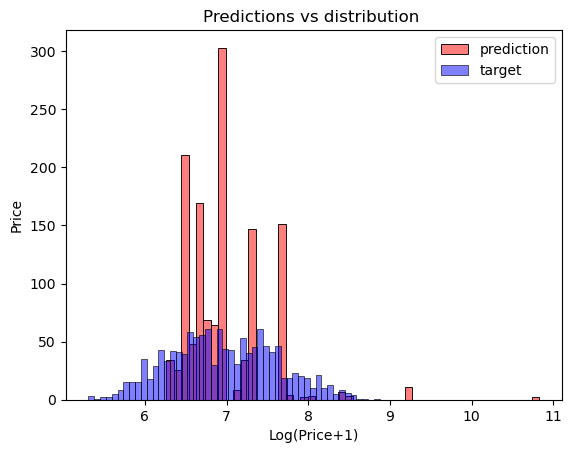

In [39]:
sns.histplot(y_pred, label = 'prediction', color='red', alpha = 0.5, bins=50)
sns.histplot(y_train, label = 'target', color='blue', alpha = 0.5, bins=50)
plt.legend()

plt.ylabel('Price')
plt.xlabel('Log(Price+1)')
plt.title('Predictions vs distribution ')

plt.show()

In [40]:
def rmse(y,y_pred):
    se= (y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [41]:
rmse(y_train, y_pred)

0.4436618109330989

In [42]:
X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

In [43]:
rmse(y_val, y_pred).round(3)

0.423

In [44]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
X_train = prepare_X(data_train).astype(float)

In [46]:
for r in [0, 0.01, 0.1, 1, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    score=rmse(y_val,y_pred)
    print(r, w0.round(2),score.round(3))


0 6.56 0.423
0.01 6.55 0.423
0.1 6.49 0.423
1 5.92 0.423
10 3.16 0.423
100 0.58 0.423


In [47]:
np.std([0.44,0.425, 0.441, 0.451,0.47,0.451, 0.468,0.43,0.407,0.446]).round

<function float64.round>

In [48]:
X_train = prepare_X(data_train).astype(float)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

X_test = prepare_X(data_test)
y_pred = w0 + X_test.dot(w)
print('val', rmse(y_test, y_pred))

train 0.4425673752632234
val 0.42157854884250967
val 0.439213723938825
